# **Project: Car Insurance Claim Prediction**


---


## **Context:**
Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, it is neccesary to build a model to predict whether a customer will make a claim on their insurance during the policy period.

Below is a csv file called car_insurance.csv, along with a table detailing the column names and descriptions.

## **Objective:**
-----

* To identify the different factors that drive customer claim decision
* To build a model to predict claim or no claim of a customer

The Data Set
```
id	Unique client identifier
age	Client's age:
        0: 16-15
        1: 26-39
        2: 40-64
        3: 65+

gender	Client's gender:
        0: Female
        1: Male

driving_experience	Years the client has been driving:
                    0: 0-9
                    1: 10-19
                    2: 20-29
                    3: 30+

education	Client's level of education:
            0: No education
            1: High school
            2: University

income	Client's income level:
        0: Poverty
        1: Working class
        2: Middle class
        3: Upper class

credit_score	Client's credit score (between zero and one)

vehicle_ownership	Client's vehicle ownership status:
                    0: Does not own their vehilce (paying off finance)
                    1: Owns their vehicle

vehcile_year	Year of vehicle registration:
                0: Before 2015
                1: 2015 or later

married	Client's marital status:
        0: Not married
        1: Married

children	Client's number of children

postal_code	Client's postal code

annual_mileage	Number of miles driven by the client each year

vehicle_type	Type of car:
                0: Sedan
                1: Sports car

speeding_violations	Total number of speeding violations received by the client

duis	Number of times the client has been caught driving under the influence of alcohol

past_accidents	Total number of previous accidents the client has been involved in

outcome	Whether the client made a claim on their car insurance (response variable):
            0: No claim
            1: Made a claim
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
org_link="https://drive.google.com/file/d/1dIjwzpFJGaRtS6ah9FTQ9Fm2RmAuuhwj/view?usp=drive_link"
file_link= org_link.split('/')[-2]
down_link='https://drive.google.com/uc?export=download&id=' + file_link
url=requests.get(down_link).text
csv_df=StringIO(url)
df=pd.read_csv(csv_df)
df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,1,0,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

Observation:
- There are 10000 observations and 18 columns
- credit_score has 9018 and annual_mileage has 9043 observations, so there are missing values in these 2 columns. We could use dropna() function to drop the missing values.

In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8149 non-null   int64  
 1   age                  8149 non-null   int64  
 2   gender               8149 non-null   int64  
 3   driving_experience   8149 non-null   object 
 4   education            8149 non-null   object 
 5   income               8149 non-null   object 
 6   credit_score         8149 non-null   float64
 7   vehicle_ownership    8149 non-null   float64
 8   vehicle_year         8149 non-null   object 
 9   married              8149 non-null   float64
 10  children             8149 non-null   float64
 11  postal_code          8149 non-null   int64  
 12  annual_mileage       8149 non-null   float64
 13  vehicle_type         8149 non-null   object 
 14  speeding_violations  8149 non-null   int64  
 15  duis                 8149 non-null   int64 

In [ ]:
df.nunique()

id                     8149
age                       4
gender                    2
driving_experience        4
education                 3
income                    4
credit_score           8149
vehicle_ownership         2
vehicle_year              2
married                   2
children                  2
postal_code               4
annual_mileage           21
vehicle_type              2
speeding_violations      21
duis                      7
past_accidents           15
outcome                   2
dtype: int64

**Observation:**
- **id** is unique for each customer and **we can drop this column** as it would not add any value to our analysis.


In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  8149 non-null   int64  
 1   gender               8149 non-null   int64  
 2   driving_experience   8149 non-null   object 
 3   education            8149 non-null   object 
 4   income               8149 non-null   object 
 5   credit_score         8149 non-null   float64
 6   vehicle_ownership    8149 non-null   float64
 7   vehicle_year         8149 non-null   object 
 8   married              8149 non-null   float64
 9   children             8149 non-null   float64
 10  postal_code          8149 non-null   int64  
 11  annual_mileage       8149 non-null   float64
 12  vehicle_type         8149 non-null   object 
 13  speeding_violations  8149 non-null   int64  
 14  duis                 8149 non-null   int64  
 15  past_accidents       8149 non-null   int64 

In [ ]:
df

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,1,0,2,0.0
9995,1,0,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9997,1,1,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,1,0,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8149.0,1.499816,1.025045,0.000000,1.000000,1.000000,2.000000,3.000000
gender,8149.0,0.498834,0.500029,0.000000,0.000000,0.000000,1.000000,1.000000
credit_score,8149.0,0.516368,0.137684,0.053358,0.417891,0.526759,0.620074,0.960819
vehicle_ownership,8149.0,0.699227,0.458622,0.000000,0.000000,1.000000,1.000000,1.000000
married,8149.0,0.501043,0.500030,0.000000,0.000000,1.000000,1.000000,1.000000
children,8149.0,0.689287,0.462814,0.000000,0.000000,1.000000,1.000000,1.000000
postal_code,8149.0,19725.567922,18784.308198,10238.000000,10238.000000,10238.000000,32765.000000,92101.000000
annual_mileage,8149.0,11693.459320,2822.351470,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
speeding_violations,8149.0,1.485581,2.244711,0.000000,0.000000,0.000000,2.000000,22.000000
duis,8149.0,0.240766,0.557408,0.000000,0.000000,0.000000,0.000000,6.000000


Observations:
- **age** The median age is 1, which might indicate that the majority of individuals in the dataset are relatively young, between 26-39 years old.
- **gender** roughly an equal distribution between the two gender.
- **credit_score** appears to be normalized between 0 and 1, with a mean around 0.52. Understanding the relationship between credit scores and insurance claims can be crucial. Higher credit scores might correlate with lower claim rates, as they could indicate financial responsibility and potentially safer driving habits.
- **vehicle_ownership** The majority of individuals in the dataset seem to own a vehicle. The presence of vehicle ownership might indicate that these individuals are more likely to make insurance claims compared to non-vehicle owners.
- **married** Approximately half of the individuals in the dataset are married. Married individuals might exhibit different driving behaviors or risk profiles compared to unmarried individuals, potentially impacting insurance claim rates.
- **children** A large portion of individuals in the dataset have children. The presence of children in the household could influence driving habits and insurance claim patterns.
- **postal_code**Postal codes vary widely, indicating a diverse geographical spread in the dataset. Geographical factors such as urban versus rural areas, traffic density, and local driving conditions can help identify geographic regions with higher claim frequencies or severity.
- **annual_mileage** Annual mileage varies among individuals, with an average around 11693 miles.
- **speeding_violations**, **duis**, **past_accidents** These variables represent driving behaviors and history, which are strong indicators of insurance claim risk. Individuals with a history of speeding violations, DUIs, or past accidents are likely to have higher claim rates. Insurers often use these factors to assess risk and set premiums accordingly.

**Creating Numerical and Categorical Values**

In [ ]:
cat_list=[]
num_list=[]

for i in df.columns:
    unique_val=len(df[i].unique())

    if unique_val<6:
        cat_list.append(i)
    else:
        num_list.append(i)

In [ ]:
cat_list

['age',
 'gender',
 'driving_experience',
 'education',
 'income',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'postal_code',
 'vehicle_type',
 'outcome']

In [ ]:
num_list

['credit_score',
 'annual_mileage',
 'speeding_violations',
 'duis',
 'past_accidents']

In [ ]:
cat_val=['age',
 'gender',
 'driving_experience',
 'education',
 'income',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'postal_code',
 'vehicle_type',
 'outcome']

num_val=['credit_score',
 'annual_mileage',
 'speeding_violations',
 'duis',
 'past_accidents']

In [ ]:
df['outcome'] = df['outcome'].astype(int)

**EDA**

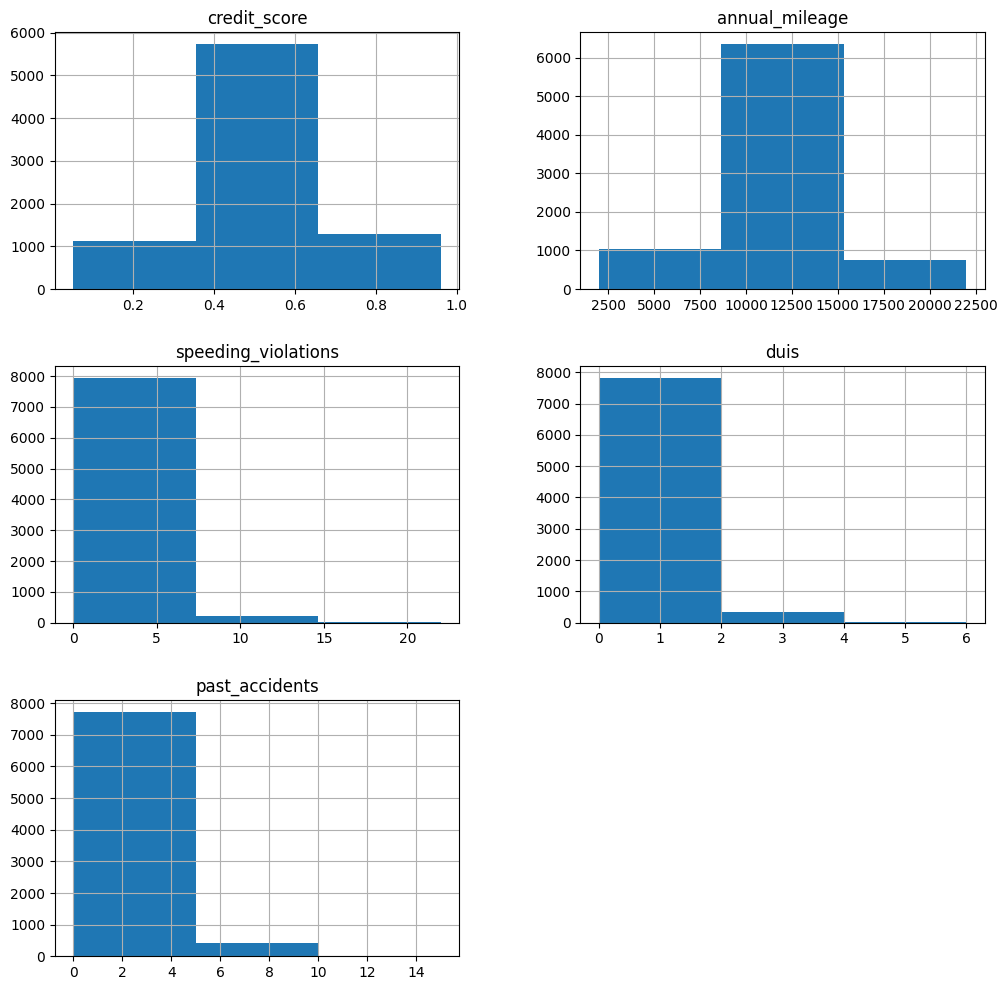

In [ ]:
df[num_val].hist(figsize=(12,12),bins=3)
plt.show()

- The credit score distribution can be consider normal distribution with the majority of client has credit score ranging from 0.3 to 0.7.
- The annual mileage is also normal distribution and that most client drives around 8000 to 15000 miles per year.
- Speeding violation, duis and past accidents distributions are all skewed to the right, these indicate client's driving behaviours and that the majority of clients have some but not a lot of violations.

Univariate analysis for categorical variables

In [ ]:
for i in cat_val:
    print(df[i].value_counts())
    print('-' * 40)

age
1    2475
2    2412
3    1641
0    1621
Name: count, dtype: int64
----------------------------------------
gender
0    4084
1    4065
Name: count, dtype: int64
----------------------------------------
driving_experience
0-9y      2864
10-19y    2662
20-29y    1756
30y+       867
Name: count, dtype: int64
----------------------------------------
education
high school    3404
university     3217
none           1528
Name: count, dtype: int64
----------------------------------------
income
upper class      3588
middle class     1727
poverty          1459
working class    1375
Name: count, dtype: int64
----------------------------------------
vehicle_ownership
1.0    5698
0.0    2451
Name: count, dtype: int64
----------------------------------------
vehicle_year
before 2015    5642
after 2015     2507
Name: count, dtype: int64
----------------------------------------
married
1.0    4083
0.0    4066
Name: count, dtype: int64
----------------------------------------
children
1.0    5617
0

**Observations:**
* Age: The majority of clients is between class 1 and 2, which is between 26 and 64.
* Driving Experience: The majority of individuals have driving experience in the '0-9y' and '10-19y' categories.
* Education and Income: The distribution of education levels shows a relatively balanced distribution across high school and university categories. Similarly, income levels are spread across different categories.
* A majority of policyholders own a vehicle, with a smaller proportion not owning one. Most vehicles were manufactured before 2015. From these, insurance companies can inform risk assessments related to vehicle ownership and the age of the vehicle.
* Marital Status and Children: The distribution of marital status and the presence of children is relatively balanced.
* The majority of vehicles are sedans.


**Bivariate and Multivariate analysis**

**Let's now check how does claim is related with other categorical variables**

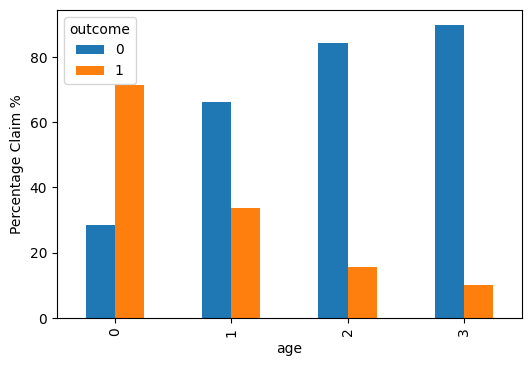

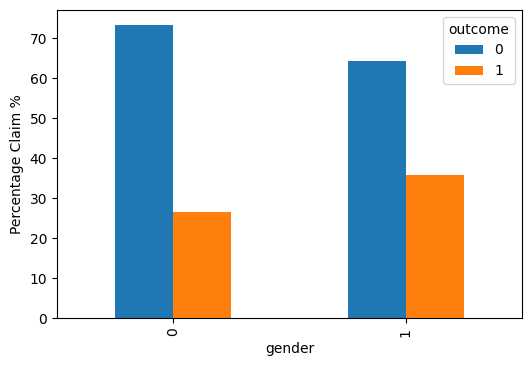

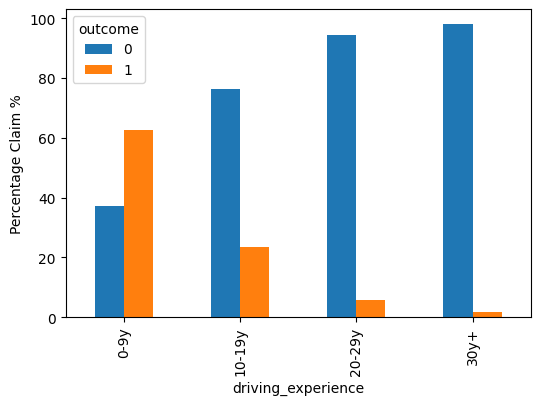

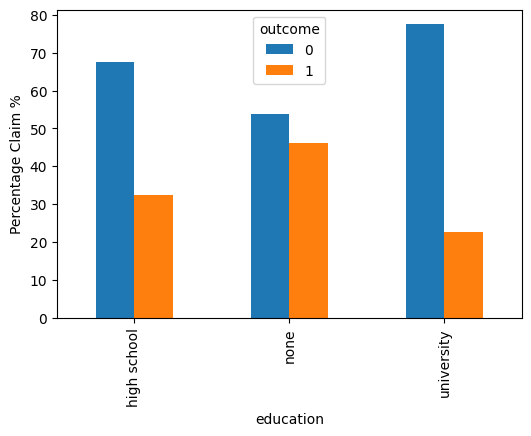

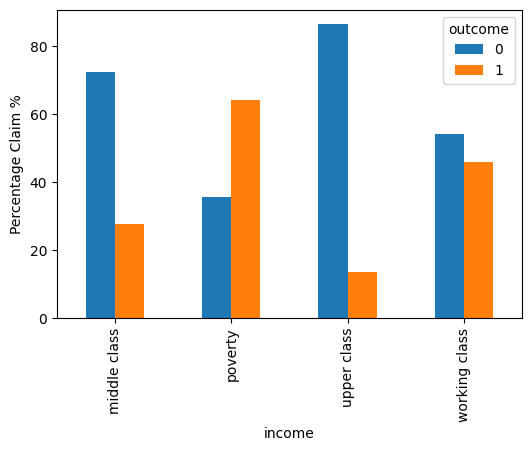

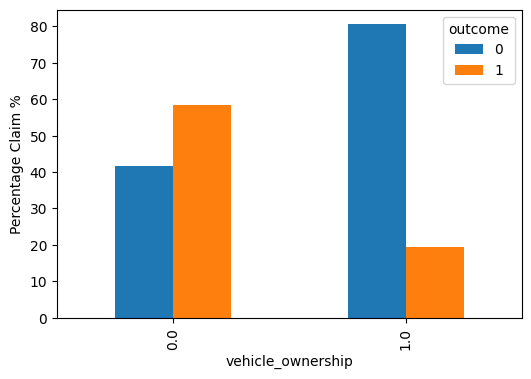

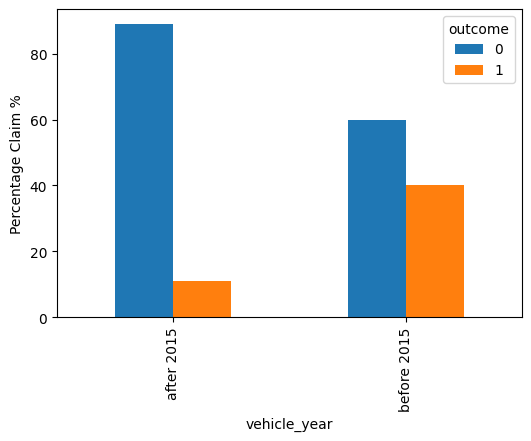

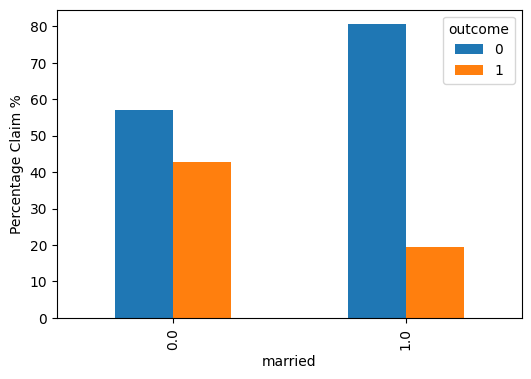

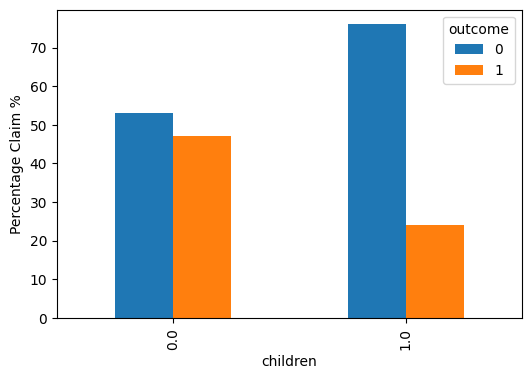

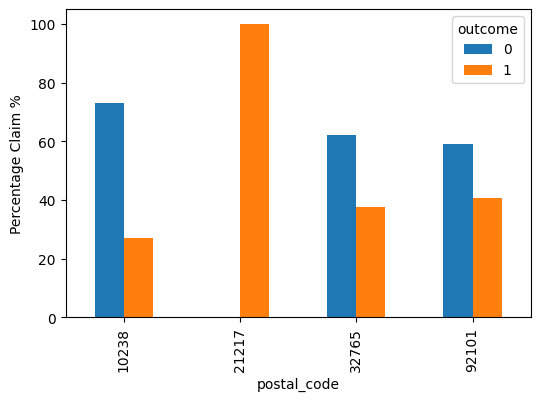

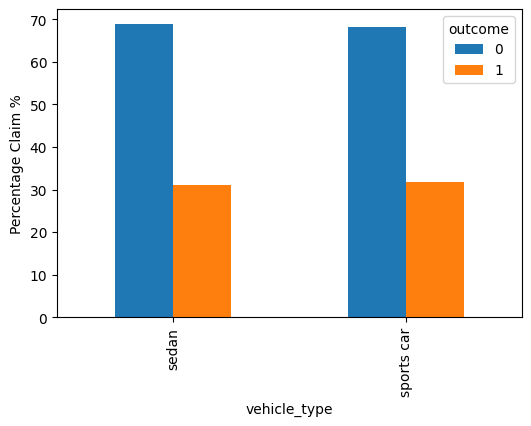

In [ ]:
for i in cat_val:
    if i != 'outcome':
        (pd.crosstab(df[i],df['outcome'],normalize='index')*100).plot(kind='bar',figsize=(6,4))
        plt.ylabel("Percentage Claim %")


**Observations:**
- Younger clients, particularly those aged 15-16, are most likely to make insurance claims, with around 70% of them doing so.
- As age increases within the client groups, the likelihood of making a claim gradually decreases.
- Male drivers have a roughly 10% higher probability of filing a claim compared to female drivers.
- Individuals with less driving experience, specifically under 9 years, have a greater than 60% chance of making a claim.
- Clients from lower socioeconomic backgrounds, including those in poverty and the working class, are more prone to filing claims than those from middle and upper-class backgrounds.
- Clients who don't own their vehicles are approximately 35% more likely to file a claim than those who do.
- Vehicles manufactured before 2015 are at a higher risk of claims.
- Notably, every client residing in the 21217 zip code area (Baltimore, Maryland) has the potential to file a claim.

In [ ]:
df.groupby(['outcome'])[num_val].count()

,credit_score,annual_mileage,speeding_violations,duis,past_accidents
outcome,,,,,
0,5613,5613,5613,5613,5613
1,2536,2536,2536,2536,2536


**Observations:**

Overall, these insights suggest that various factors such as credit score, driving behavior (speeding violations, DUIs), and past driving history (accidents) play crucial roles in determining the likelihood of filing an insurance claim. Clients with poorer credit scores, higher annual mileage, more speeding violations, DUIs, and past accidents are generally more prone to filing claims.

**Correlation Analysis, Task: Compute the correlation matrix for the numerical variables in the DataFrame**

<Axes: >

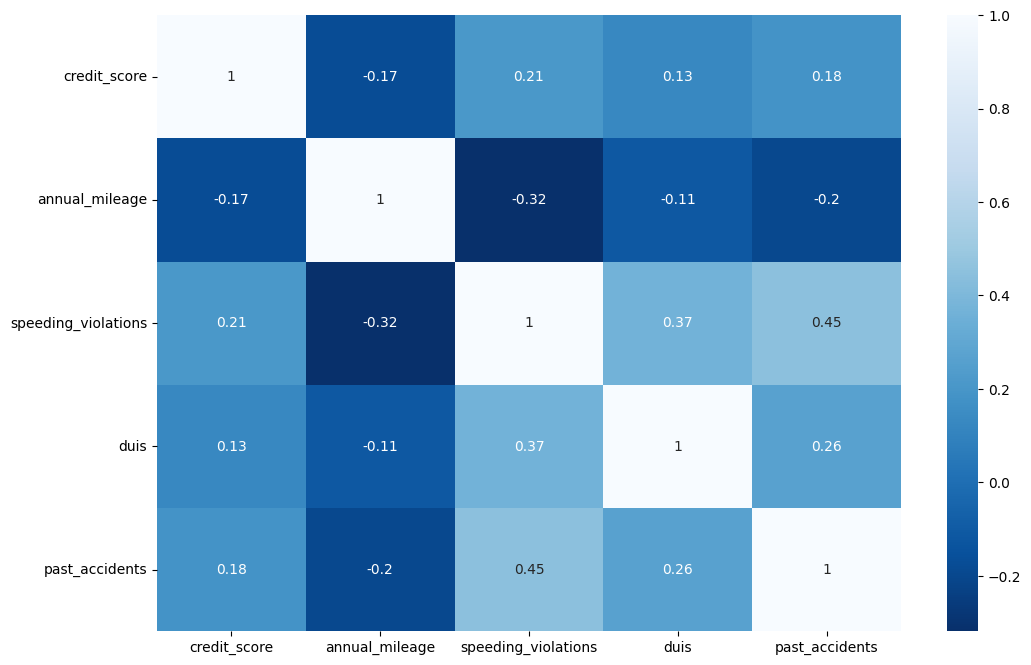

In [ ]:
corr=df[num_val].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='Blues_r')

**Observations**
- Credit Score has a small positive correlation with speeding violations (0.208) and past accidents (0.182), indicating that as the credit score increases, there's a slight tendency for the number of speeding violations and past accidents to increase as well. However, these correlations are not particularly strong.
- Annual Mileage has a negative correlation with all other variables, suggesting that as the annual mileage increases, there's a tendency for the credit score to decrease and for the number of speeding violations, DUIs, and past accidents to decrease as well.
- Speeding Violations have the strongest correlation with past accidents, suggesting that speeding violations are closely associated with a history of accidents.
- As the number of DUIs increases, there's a tendency for the number of speeding violations and past accidents to increase as well.
- Past Accidents increase will tend to lead to the increase in speeding violations and DUIs t as well.

**Data preparation**

Converting binary categorical columns to integer type, mapping 'sedan' to 1 and 'sports car' to 0 in the 'vehicle_type' column, and generating dummy variables for specified categorical columns.

In [ ]:
binary_columns=['vehicle_ownership','married','children','gender']
df[binary_columns] = df[binary_columns].astype(int)

In [ ]:
df['vehicle_type']=df['vehicle_type'].map({'sedan':1, 'sports car':0})

In [ ]:
df['vehicle_year']=df['vehicle_year'].map({'after 2015':1, 'before 2015':0})

In [ ]:
to_get_dummies_for = ['driving_experience','education','income','postal_code']
df = pd.get_dummies(data = df, columns= to_get_dummies_for, drop_first= True)

In [ ]:
df = df.round(2)
df

,age,gender,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,...,driving_experience_20-29y,driving_experience_30y+,education_none,education_university,income_poverty,income_upper class,income_working class,postal_code_21217,postal_code_32765,postal_code_92101
0,3,0,0.63,1,1,0,1,12000.0,1,0,...,False,False,False,False,False,True,False,False,False,False
1,0,1,0.36,0,0,0,0,16000.0,1,0,...,False,False,True,False,True,False,False,False,False,False
2,0,0,0.49,1,0,0,0,11000.0,1,0,...,False,False,False,False,False,False,True,False,False,False
3,0,1,0.21,1,0,0,1,11000.0,1,0,...,False,False,False,True,False,False,True,False,True,False
4,1,1,0.39,1,0,0,0,12000.0,1,2,...,False,False,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,0.45,1,0,0,0,16000.0,1,1,...,False,False,False,False,False,False,False,False,False,False
9995,1,0,0.58,1,0,0,0,16000.0,1,0,...,False,False,False,True,False,True,False,False,False,False
9997,1,1,0.47,1,0,0,1,14000.0,1,0,...,False,False,False,False,False,False,False,False,False,False
9998,1,0,0.36,0,0,0,1,13000.0,1,2,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 8149 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        8149 non-null   int64  
 1   gender                     8149 non-null   int64  
 2   credit_score               8149 non-null   float64
 3   vehicle_ownership          8149 non-null   int64  
 4   vehicle_year               8149 non-null   int64  
 5   married                    8149 non-null   int64  
 6   children                   8149 non-null   int64  
 7   annual_mileage             8149 non-null   float64
 8   vehicle_type               8149 non-null   int64  
 9   speeding_violations        8149 non-null   int64  
 10  duis                       8149 non-null   int64  
 11  past_accidents             8149 non-null   int64  
 12  outcome                    8149 non-null   int64  
 13  driving_experience_10-19y  8149 non-null   bool   
 1


**Separating the independent (X) and dependent variables (Y)**

In [ ]:
y= df.outcome
X= df.drop(['outcome'],axis=1)


**Scaling the data**

The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is Feature Scaling, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples (zero) and s is the standard deviation of the training samples.

In [ ]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

Split the data into 70% training and 30% testing data. Use `stratify=y` to preserve relative class frequencies.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1,stratify=y)

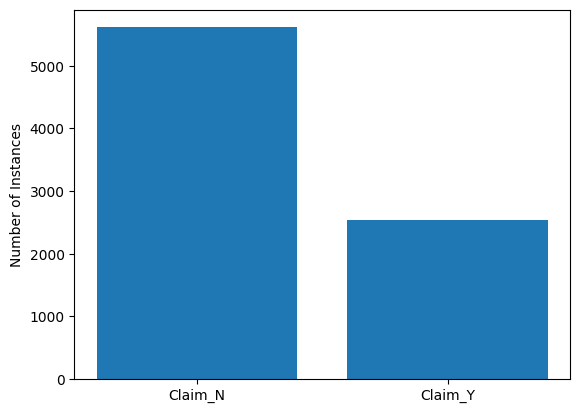

In [ ]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Claim_N', 'Claim_Y'])
plt.ylabel('Number of Instances')
plt.show()

In [ ]:
print('% Class 0 =',counts[0]/(counts[0]+counts[1]))
print('% Class 1 =',counts[1]/(counts[0]+counts[1]))

% Class 0 = 0.6887961713093631
% Class 1 = 0.3112038286906369


We can see that there's a significant class imbalance; it's essential to handle it appropriately during model training to prevent biased predictions and ensure that the model performs well on both classes. One technique that we are going to use later is using class weights during model training to help address this issue.








**Defining model function**

Create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [ ]:
def model(actual,predict):
    print(classification_report(actual,predict))
    CM=confusion_matrix(actual,predict)
    print(CM)
    score = round(accuracy_score(actual,predict),2)*100
    plt.figure(figsize=(8,5))
    print(f"accuracy is {score} %")
    sns.heatmap(CM,annot=True,cmap='Blues_r',xticklabels=['Claim_Status_N', 'Claim_Status_Y'], yticklabels=['Claim_Status_N', 'Claim_Status_Y'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return score

### Logistic Regression Model
Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))
Setting class_weight='balanced' in logistic regression helps handle imbalanced datasets by automatically adjusting weights for each class. Additionally, random_state=42 ensures reproducibility, making your results consistent across different runs of the model.

Train Data Performance - 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3929
           1       0.70      0.87      0.78      1775

    accuracy                           0.84      5704
   macro avg       0.82      0.85      0.83      5704
weighted avg       0.86      0.84      0.85      5704

[[3271  658]
 [ 230 1545]]
accuracy is 84.0 %


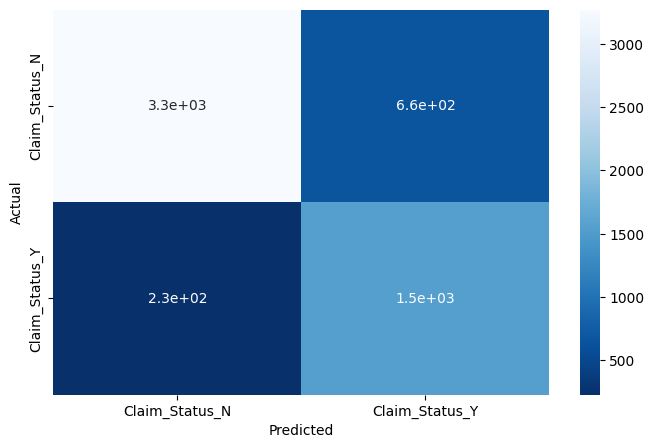



Test Data Performance - 
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1684
           1       0.70      0.85      0.77       761

    accuracy                           0.84      2445
   macro avg       0.81      0.84      0.82      2445
weighted avg       0.85      0.84      0.84      2445

[[1406  278]
 [ 115  646]]
accuracy is 84.0 %


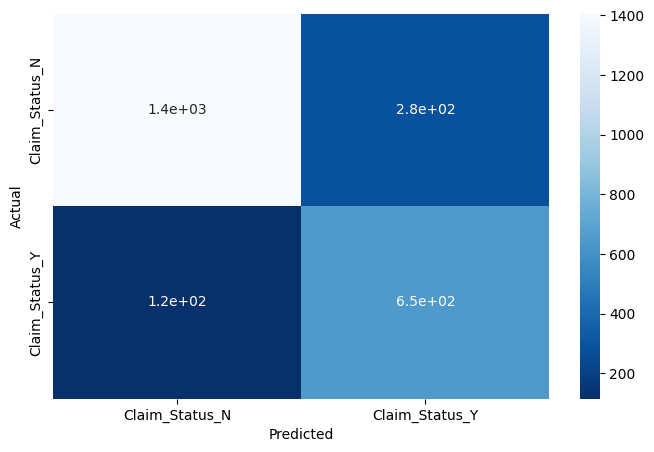

In [ ]:
lg=LogisticRegression(class_weight='balanced',random_state=42)
lg.fit(X_train,y_train)
#checking model performace of training data
y_pred_train = lg.predict(X_train)
print("Train Data Performance - ")
model(y_train,y_pred_train)
#checking model performace of test data
y_pred_test = lg.predict(X_test)
print("\n")
print("Test Data Performance - ")
score_lr = model(y_test, y_pred_test)

In [ ]:
#Calculating balanced accuracy
train_balanced_accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("Balanced Accuracy (Train):", train_balanced_accuracy)

# Checking model performance on test data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced Accuracy (Test):", test_balanced_accuracy)

Balanced Accuracy (Train): 0.8514749479314164
Balanced Accuracy (Test): 0.8418999566141563


**Observations:**

- Precision, recall, F1-score, accuracy, and the confusion matrix are similar to the train data performance, indicating consistent performance on unseen data.
- An accuracy of 84% indicates the good overall ability of the model to predict across all classes.
- Recall is 83% for Class 0 and 85% for Class 1, indicating that the model correctly identifies 85% of the actual claim cases and 83% of the actual non-claim cases. Although these metrics are good, we would want to try to adjust the threshold to see if we can improve the recall score for Class 1 further.
- False Positives (FP) indicate instances where the model incorrectly predicts a claim when the actual class is no claim. In our logistic regression model, FP is 658. We would want this number to be lower, as falsely defining a claim where there is none will lead the insurance company to charge premium prices above the market price, resulting in loss of customers.

**Adjusting Thresholds**
Adjusting the threshold in a classification model is often necessary to optimize the balance between precision and recall or to suit specific business requirements. In our case, we have an imbalanced dataset, and we want to improve the Recall score, so we decide to adjust the threshold.

[[0.94197946 0.05802054]
 [0.99840075 0.00159925]
 [0.94132887 0.05867113]
 ...
 [0.02350913 0.97649087]
 [0.99408568 0.00591432]
 [0.70268346 0.29731654]]


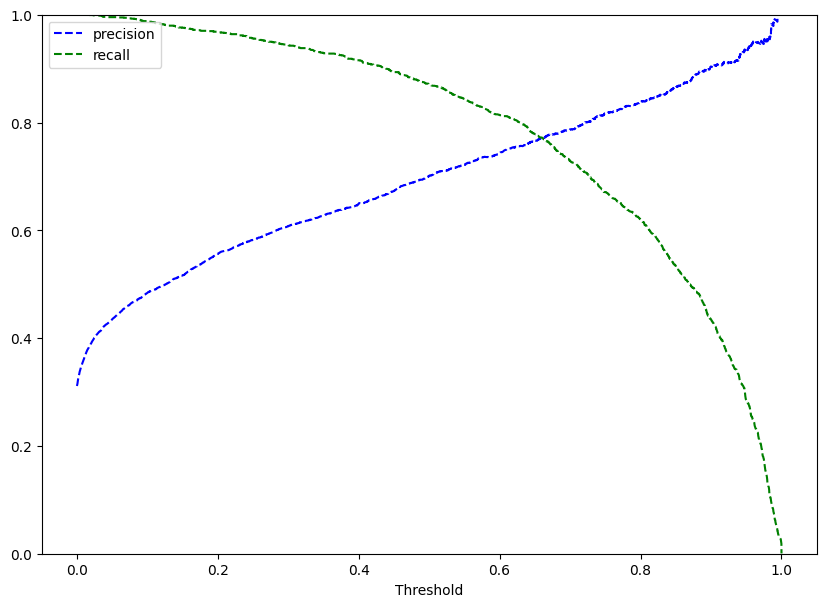

In [ ]:
y_scores_lg=lg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class
print(y_scores_lg)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1684
           1       0.80      0.72      0.76       761

    accuracy                           0.86      2445
   macro avg       0.84      0.82      0.83      2445
weighted avg       0.85      0.86      0.85      2445

[[1544  140]
 [ 212  549]]
accuracy is 86.0 %


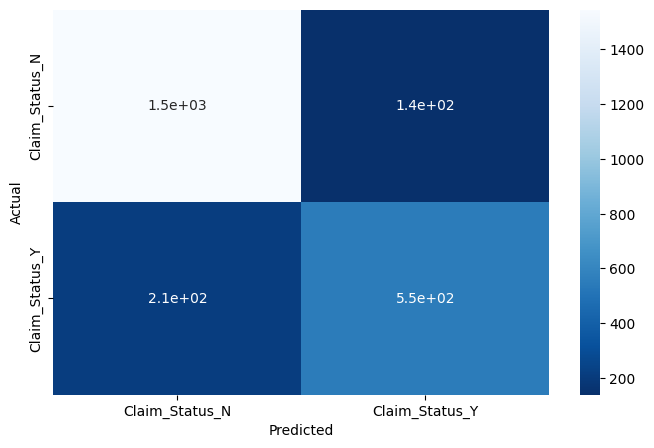

86.0

In [ ]:
optimal_threshold1=.7
y_pred_test = lg.predict_proba(X_test)
model(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observation**

Comparing the results before and after adjusting the threshold helps assess the impact of threshold adjustment on the model's performance. It allows us to determine whether changing the threshold improves or degrades the model's ability to correctly classify instances into the desired classes.

In this case, adjusting the threshold from its default value leads to different trade-offs between precision and recall, where we received higher recall score for class 1 (0.98), the accuracy score decreased(0.67).

Therefore, we might use the original model and not the model after adjusting the threshold.

In [ ]:
#printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

coef_df=pd.DataFrame(coef_lg,columns=cols).T.sort_values(by=0,ascending=False)
coef_df

,0
postal_code_21217,1.255490
postal_code_32765,0.646726
gender,0.567721
annual_mileage,0.426440
postal_code_92101,0.342386
income_working class,0.051473
speeding_violations,0.037092
duis,0.033952
credit_score,0.024516
education_none,0.002287


**Observation:**

Features which have a strong positive effect on claim rate are:

- postal_code_21217
- postal_code_32765
- gender
- annual_mileage
- postal_code_92101

Features which have a strong negative effect on claim rate are:

- vehicle_ownership
- vehicle_year
- driving_experience_10-19y
- driving_experience_30y+
- driving_experience_20-29y







In [ ]:
odds = np.exp(lg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False)

,odds
postal_code_21217,3.509559
postal_code_32765,1.909280
gender,1.764242
annual_mileage,1.531794
postal_code_92101,1.408304
income_working class,1.052820
speeding_violations,1.037789
duis,1.034535
credit_score,1.024819
education_none,1.002289


**Observation:**
- The odds of an insurance claim for policyholders residing in postal_code_21217(Baltimore) are approximately 3.51 times higher compared to the reference group. Similarly, policyholders in postal_code_32765(Oviedo-FL) have odds approximately 1.91 times higher. This suggests that individuals living in these areas are more likely to file insurance claims, possibly due to higher incidences of accidents or other risk factors associated with these locations.
- The odds for male policyholders filing an insurance claim are 1.76 times higher compared to female policyholders, meaning gender plays a role in insurance claim likelihood, with males having a higher likelihood, possibly due to differences in driving behavior or risk profiles.
- Policyholders with higher annual mileage have higher odds (1.53 times) of filing insurance claims. This aligns with the understanding that increased driving activity typically correlates with higher accident rates, leading to a greater likelihood of insurance claims.
- No surprises, both speeding_violations and DUIs contribute to increased odds of filing insurance claims.
- Higher credit score has lower odds of filing insurance claims, indicating that individuals with better credit scores are more responsible and less likely to engage in risky behavior while driving, leading to fewer insurance claims.
- Being married is associated with lower odds (0.84 times) of filing insurance claims. This suggests that married individuals may exhibit more cautious driving behavior or benefit from having more stable lifestyles, resulting in fewer insurance claims.

**This plot visualizes the coefficients between variables and claims, providing valuable insights into the relative importance of different features in predicting the likelihood of an insurance claim.**

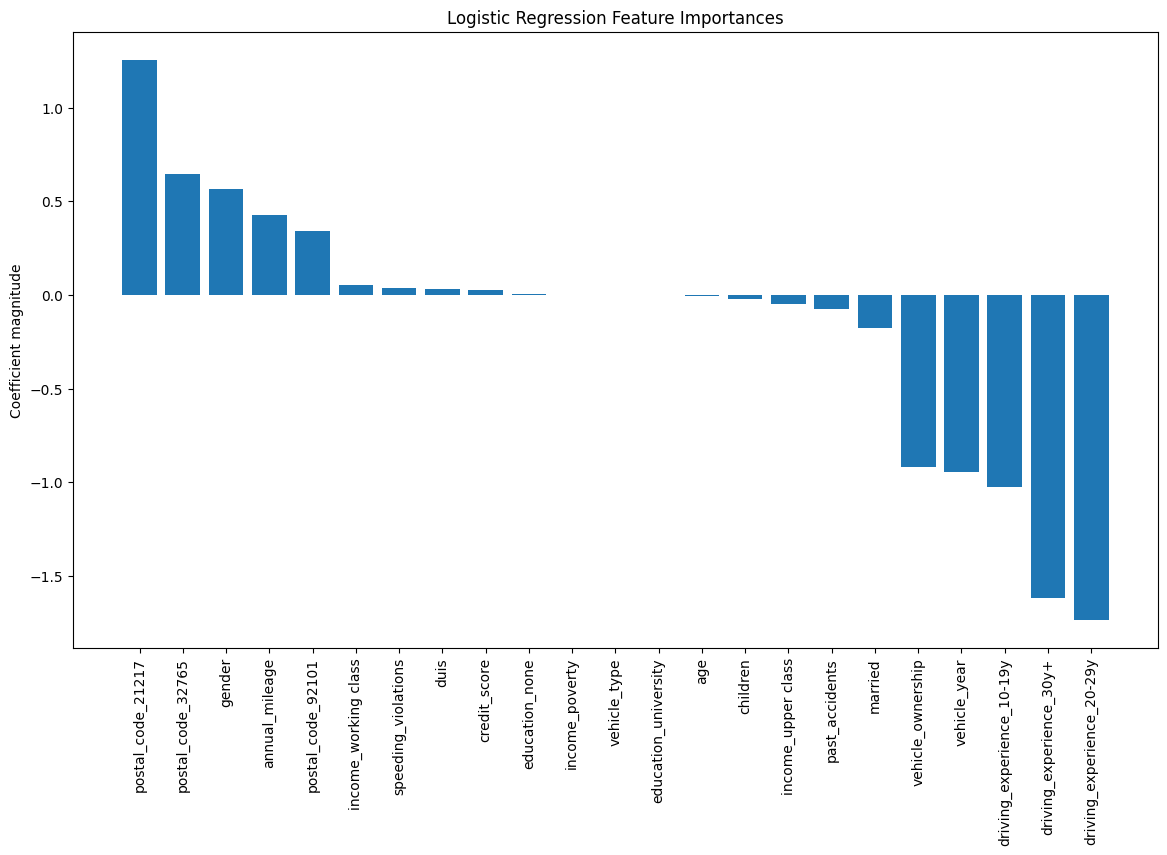

In [ ]:
#plt.figure(figsize=(20,20))
#sns.barplot(x=coef_df[0],y=coef_df.index,orient='h')
#plt.title("Logistic Regression Feature Importances")
#plt.xlabel('Coefficient magnitude')
#plt.show()

feature_importance = lg.coef_[0]
# Create a pandas Series for feature importances with feature names as the index
feature_importances = pd.Series(feature_importance, index=cols)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(14, 8))
plt.title("Logistic Regression Feature Importances")
plt.bar(sorted_importances.index, sorted_importances.values, align='center')
plt.xticks(rotation=90)
plt.ylabel('Coefficient magnitude')
plt.show()

Observation:
- postal_code_21217(Baltimore-Maryland): This postal code has the highest coefficient, indicating that individuals residing in this area are more likely to file insurance claims compared to other variables.
- postal_code_32765(Oviedo-Florida), gender, annual_mileage, and postal_code_92101(San Diego-California): These features also have positive coefficients, suggesting that they contribute to an increased likelihood of insurance claims.
- For example, individuals with higher annual mileage or from specific postal codes may face even higher risk factors leading to more claims.

- vehicle_ownership and vehicle_year: These features have the most negative coefficients, implying that individuals owning a vehicle or having a vehicle from a specific year are less likely to file insurance claims. This could be due to factors such as better vehicle maintenance or driving habits.
- driving_experience_10-19y, driving_experience_30y+, and driving_experience_20-29y: Longer driving experience correlates with lower coefficients, indicating reduced likelihood of filing claims. This suggests that experienced drivers may exhibit safer driving behavior, leading to fewer claims.



Based on these insights, insurance companies can take several actions to better manage risk and optimize their operations:

- Premium Pricing: Adjust premium prices based on postal codes and other demographic factors that influence claim likelihood. Higher premiums may be justified for policyholders residing in areas with a higher likelihood of claims, such as Baltimore or Oviedo areas.

- Underwriting Practices: Incorporate features like annual mileage, vehicle ownership, and vehicle year into underwriting models to assess risk accurately. Policyholders with lower-risk profiles, such as those owning vehicles or with newer vehicles, may qualify for lower premiums.

- Risk Mitigation Strategies: Develop targeted risk mitigation strategies for policyholders with higher-risk profiles, such as those with specific postal codes or driving experiences. For instance, insurance companies can offer safe driving incentives or discounts to encourage safer behavior among high-risk policyholders.

- Customer Segmentation: Segment customers based on demographic and behavioral factors to tailor insurance products and services. For example, insurance companies can offer specialized insurance packages for experienced drivers with lower claim likelihoods.

- Loss Prevention Measures: Implement initiatives to reduce the likelihood of claims, such as promoting vehicle maintenance and safe driving practices among policyholders. This can help mitigate risks associated with factors like vehicle ownership and driving experience.

### Decision Tree Classifier Model

Decision Tree Classification is a supervised learning algorithm primarily designed for solving classification problems, particularly those with discrete target variables having multiple classes. It works by partitioning the feature space into segments based on feature values, aiming to create decision rules that split the data into groups that are as homogenous as possible in terms of the target variable.

Train Data Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3929
           1       1.00      1.00      1.00      1775

    accuracy                           1.00      5704
   macro avg       1.00      1.00      1.00      5704
weighted avg       1.00      1.00      1.00      5704

[[3924    5]
 [   0 1775]]
accuracy is 100.0 %


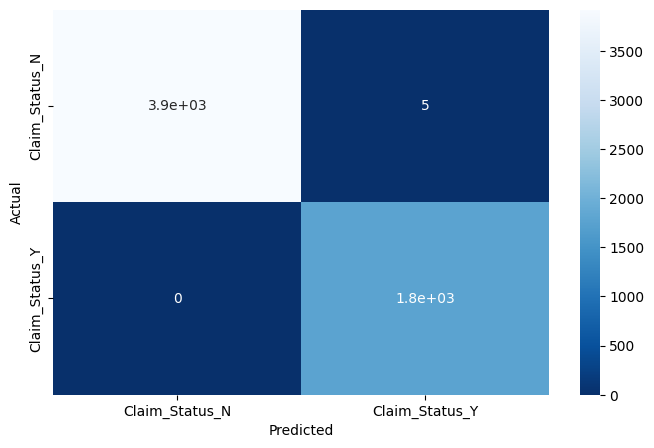

Test Data Performance
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1684
           1       0.67      0.66      0.67       761

    accuracy                           0.79      2445
   macro avg       0.76      0.76      0.76      2445
weighted avg       0.79      0.79      0.79      2445

[[1439  245]
 [ 258  503]]
accuracy is 79.0 %


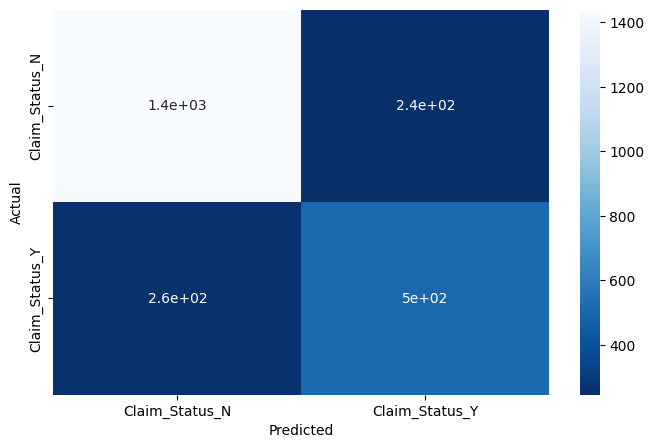

In [ ]:
#Fitting Decision Tree
algorithm = DecisionTreeClassifier(class_weight='balanced',random_state=42)
DT = algorithm.fit(X_train, y_train)

# Checking model performance on training data
y_pred_train = algorithm.predict(X_train)
print("Train Data Performance")
train_score = model(y_train, y_pred_train)

# Checking model performance on test data
y_pred_test = algorithm.predict(X_test)
print("Test Data Performance")
test_score = model(y_test, y_pred_test)

**Observations:**

**Training Data Performance:**
- The model achieves perfect precision, recall, and F1-score for both classes 0 and 1 in the training dataset, with an accuracy of 100%.

**Test Data Performance:**
- While the model performs exceptionally well on the training data, its performance slightly deteriorates on unseen test data, particularly in correctly identifying instances of claim. This suggests that the model may be overfitting.
- The precision, recall, and F1-score for no claim data are all 0.85, indicating that the model correctly identifies 85% of the actual no-claim cases. However, for claim data, the precision, recall, and F1-score drop to 0.67, indicating that the model correctly identifies only 67% of the actual claim cases.
- The overall accuracy of the model on the test dataset is 79%
- The confusion matrix shows that there are more false negatives (258) than false positives (245), indicating that the model is better at predicting instances of no claim than instances of claim in the test dataset.

In [ ]:
from sklearn.metrics import make_scorer, f1_score
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [10, 15, 20],  # Adjust the range of max_depth values to search over
    'min_samples_split': [2, 5, 10],  # Adjust the range of min_samples_split values
    'min_samples_leaf': [1, 2, 4],  # Adjust the range of min_samples_leaf values
}

# Create Decision Tree Classifier
dte = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define the scorer
scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dte, param_grid=param_grid, scoring=scorer, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (F1):", best_score)

# Get the best classifier with the optimal hyperparameters
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the test set
y_pred_train = best_classifier.predict(X_train)
y_pred_test = best_classifier.predict(X_test)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (F1): 0.7261123055477597


To enhance our target metrics, such as recall and accuracy scores, further optimization and fine-tuning of the model are necessary. In this case, we employ a method called GridSearch.

**GridSearch** is a method used for hyperparameter optimization, where it systematically searches through a specified parameter grid to find the optimal combination of hyperparameters that maximize the performance of the model according to a predefined evaluation metric.

These codes aboves initialize a Decision Tree Classifier, defines a custom scoring function, performs a grid search to find the best hyperparameters, and evaluates the best classifier's performance on training and test data.








Train Data Performance - 
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3929
           1       0.72      0.93      0.81      1775

    accuracy                           0.87      5704
   macro avg       0.84      0.88      0.85      5704
weighted avg       0.89      0.87      0.87      5704

[[3284  645]
 [ 121 1654]]
accuracy is 87.0 %


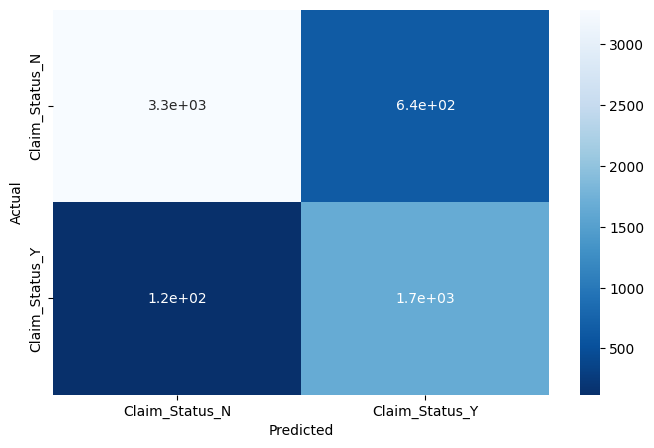



Test Data Performance - 
              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1684
           1       0.66      0.81      0.73       761

    accuracy                           0.81      2445
   macro avg       0.78      0.81      0.79      2445
weighted avg       0.83      0.81      0.81      2445

[[1360  324]
 [ 142  619]]
accuracy is 81.0 %


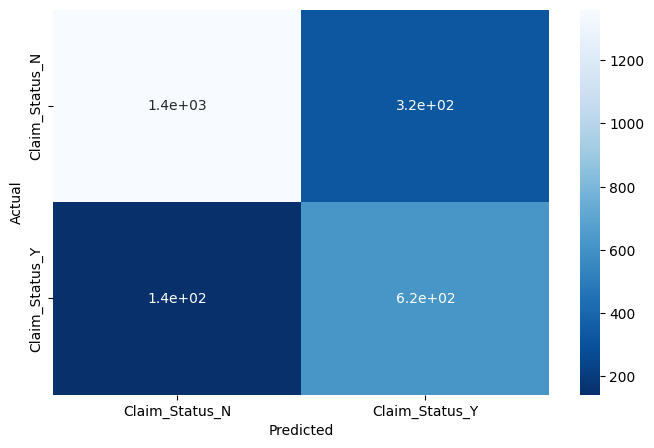

81.0

In [ ]:

print("Train Data Performance - ")
model(y_train,y_pred_train)
print("\n")
print("Test Data Performance - ")
model(y_test, y_pred_test)

In [ ]:
#Calculating balanced accuracy
train_balanced_accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("Balanced Accuracy (Train):", train_balanced_accuracy)

# Checking model performance on test data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced Accuracy (Test):", test_balanced_accuracy)

Balanced Accuracy (Train): 0.8838335382618951
Balanced Accuracy (Test): 0.8105021833379633


**Observation:**

After applying the GridSearch method, the performance of the Decision Tree model shows significant differences in both the train and test datasets.

**Train Data Performance:**
- The model no longer exhibits perfect performance of 100% for every class
- However, it achieves a remarkably high recall score of 0.93, indicating excellent performance in identifying claim instances by correctly classifying a high proportion of actual claim instances.
- The overall accuracy of the model on the train data remains relatively high, at about 87%.

**Test Data Performance:**
- For class 1 (claim), the recall is 0.81, which is lower than what was achieved in the train dataset but still relatively high.
- The overall accuracy of the model on the test data is 81%.

**Feature Importance**

Calculate and visualize the feature importance of the best estimator obtained after fitting a GridSearchCV method. It helps in identifying which features are most influential in claim predictions. This insight is valuable for understanding the underlying patterns learned by the model.

<Axes: xlabel='Importance', ylabel='Feature'>

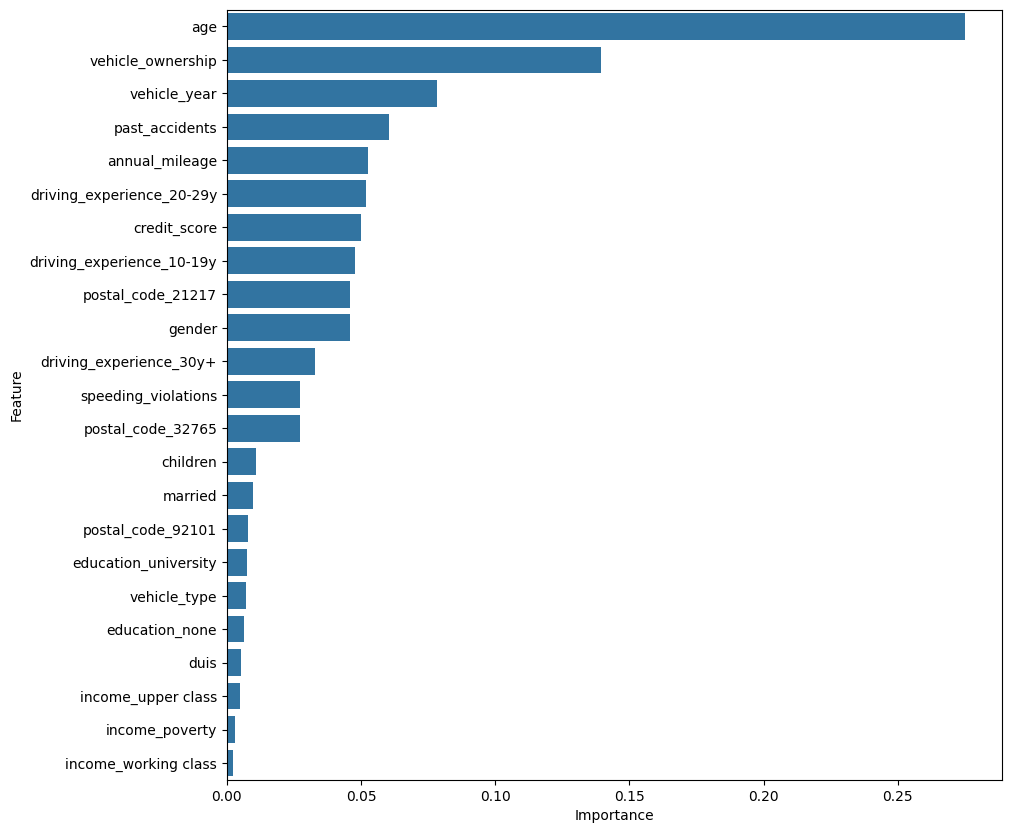

In [ ]:
# After fitting GridSearchCV and obtaining the best estimator
best_estimator = grid_search.best_estimator_

# Access feature importances
feature_importances = best_estimator.feature_importances_

# Assuming you have a DataFrame with feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the important features
plt.figure(figsize=(10,10))
sns.barplot(x=importance_df.Importance,y=importance_df.Feature)

**Observations:**
This graph provides insights into which features are most important for predicting the likelihood of car insurance claims:

- Age (27.51% Importance): Age stands out as the most influential factor, suggesting it plays a significant role in determining the likelihood of filing insurance claims. Younger or older drivers may exhibit riskier driving behaviors or encounter different road conditions, affecting their chances of being in accidents.
- Vehicle Ownership (13.94% Importance): Whether an individual owns the vehicle is the second most important factor. This implies that vehicle owners are more likely to make insurance claims compared to non-owners. Vehicle ownership suggests a higher level of responsibility and potentially more frequent vehicle usage, which could lead to more accidents or damage requiring insurance claims.

### Random Forest

**Random Forest** uses the concept of ensemble learning, where multiple models are trained to solve the same problem and their predictions are combined to improve the overall performance. In the case of classification, it predicts the majority class among all the trees.

Train Data Performance - 
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3929
           1       0.76      0.92      0.83      1775

    accuracy                           0.88      5704
   macro avg       0.86      0.89      0.87      5704
weighted avg       0.90      0.88      0.89      5704

[[3415  514]
 [ 145 1630]]
accuracy is 88.0 %


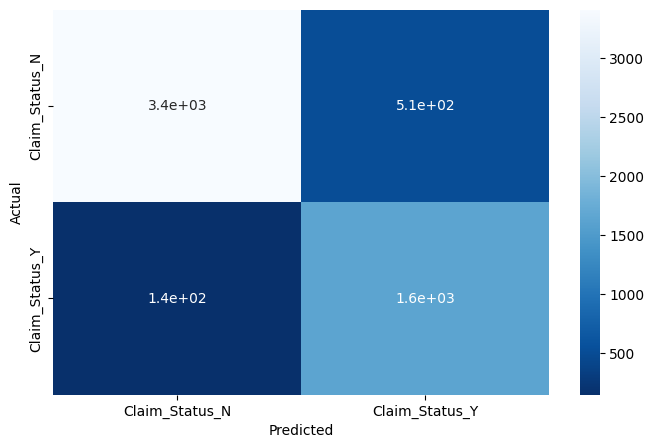



Test Data Performance - 
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1684
           1       0.72      0.81      0.76       761

    accuracy                           0.84      2445
   macro avg       0.81      0.83      0.82      2445
weighted avg       0.85      0.84      0.84      2445

[[1439  245]
 [ 141  620]]
accuracy is 84.0 %


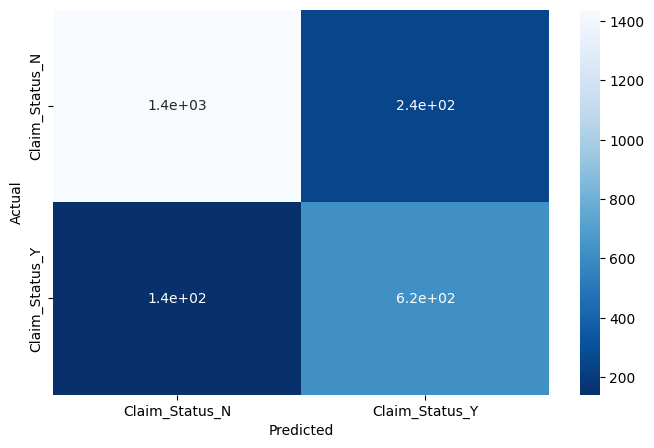

84.0

In [ ]:
clf = RandomForestClassifier(class_weight='balanced', n_estimators= 300,max_depth=10, random_state=42)
clf.fit(X_train,y_train)
#checking model performace of training data
y_pred_train = clf.predict(X_train)
print("Train Data Performance - ")
model(y_train,y_pred_train)
#checking model performace of test data
y_pred_test = clf.predict(X_test)
print("\n")
print("Test Data Performance - ")
model(y_test, y_pred_test)

In [ ]:
f1_score(y_test, y_pred_test)

0.7626076260762608

In [ ]:
#Calculating balanced accuracy
train_balanced_accuracy = balanced_accuracy_score(y_train, y_pred_train)
print("Balanced Accuracy (Train):", train_balanced_accuracy)

# Checking model performance on test data
test_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced Accuracy (Test):", test_balanced_accuracy)

Balanced Accuracy (Train): 0.8937438835097631
Balanced Accuracy (Test): 0.8346152705684794


**Observations:**
- Train Data Performance: The model achieves a high accuracy of 88% on the training dataset, with a precision of 96% for class 0 (no claim) and 76% for class 1 (claim). The recall scores are also impressive: 92% for the claim class and 87% for the no-claim class, indicating that the model effectively identifies both classes.
- Test Data Performance: The model maintains good performance on the test dataset, with an accuracy of 84%. However, there's a slight drop in precision and recall compared to the training set, suggesting some generalization issues. The model correctly identifies 81% of claims and 85% of no-claims. Nonetheless, the model demonstrates robustness in classifying instances into the correct categories.

Feature Importance

<Axes: xlabel='Importance', ylabel='None'>

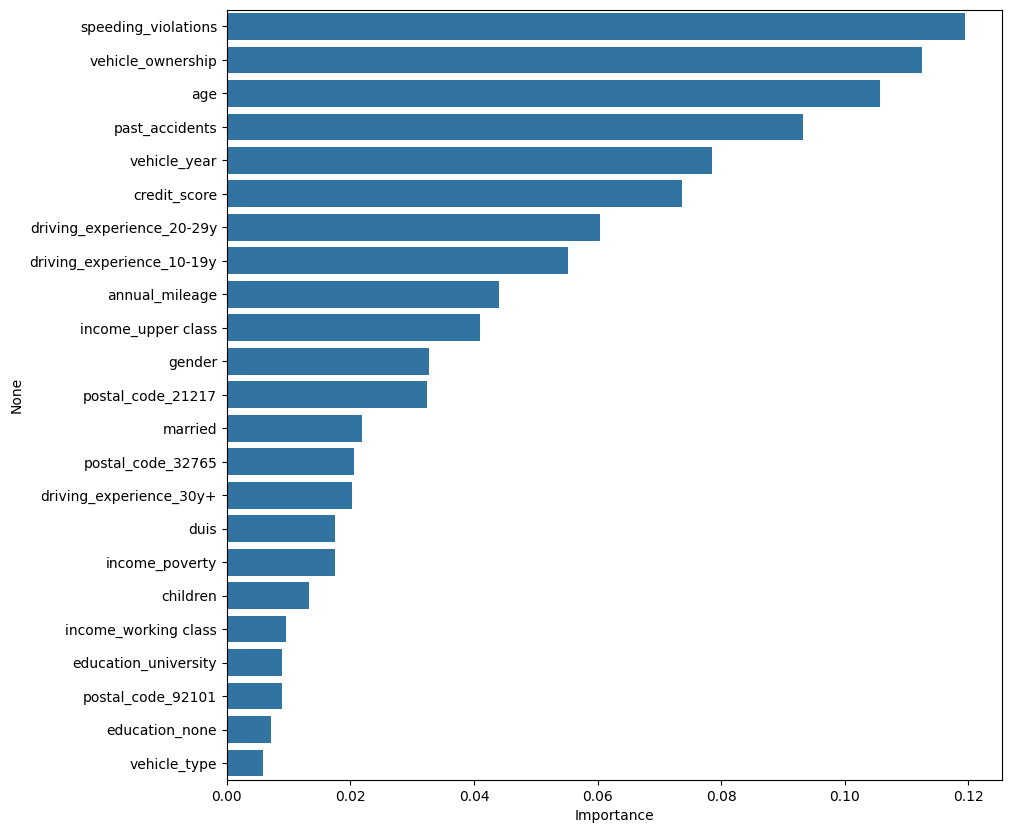

In [ ]:
importances = clf.feature_importances_
columns=X.columns
importance_clf=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=importance_clf.Importance,y=importance_clf.index)

**Observations:**
These feature importance scores provide insights into which factors are most influential in predicting car insurance claims:

- Speeding Violations (11.95% Importance): This feature holds the highest importance, suggesting that individuals with a history of speeding violations are more likely to file insurance claims.
- Vehicle Ownership (11.25% Importance): Ownership of the vehicle is also significant, indicating that individuals who own their vehicles are more prone to making insurance claims compared to non-owners.
- Age (10.57% Importance): Age plays a notable role, with younger or older individuals being associated with different claim likelihoods, potentially due to differences in driving behavior or risk exposure.

### K- NEAREST NEIGHBOR (kNN)

KNN works by finding the 'k' nearest data points to a given observation (based on a distance metric), and then assigns the observation to the class that is most common among its nearest neighbors. It is better performing algorithm compared to other traditional classifiers on imbalanced datasets

Train Data Performance - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3929
           1       1.00      1.00      1.00      1775

    accuracy                           1.00      5704
   macro avg       1.00      1.00      1.00      5704
weighted avg       1.00      1.00      1.00      5704

[[3928    1]
 [   4 1771]]
accuracy is 100.0 %


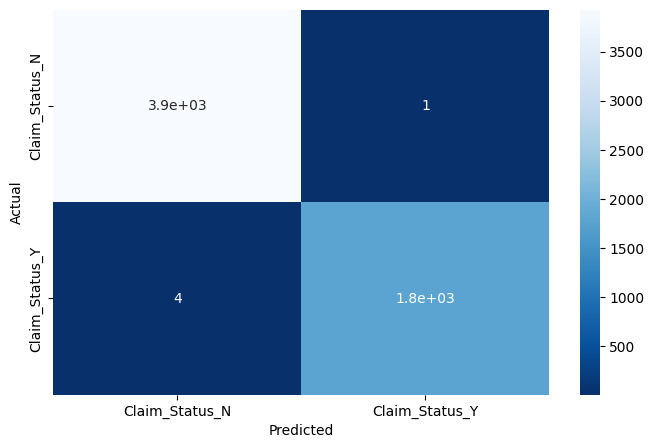



Test Data Performance - 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1684
           1       0.72      0.68      0.70       761

    accuracy                           0.82      2445
   macro avg       0.79      0.78      0.78      2445
weighted avg       0.82      0.82      0.82      2445

[[1488  196]
 [ 247  514]]
accuracy is 82.0 %


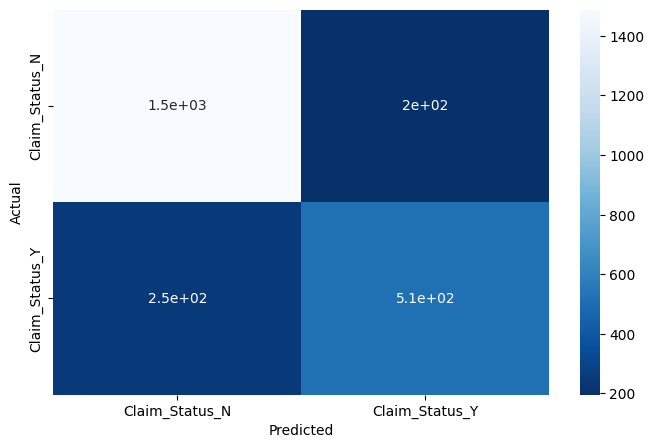

82.0

In [ ]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train,y_train)
#checking model performace of training data
y_pred_train = knn.predict(X_train)
print("Train Data Performance - ")
model(y_train,y_pred_train)
#checking model performace of test data
y_pred_test = knn.predict(X_test)
print("\n")
print("Test Data Performance - ")
model(y_test, y_pred_test)

**Observations:**

**Train Data Performance:**
The model's performance on the training dataset is perfect, achieving an accuracy of 100%, with both precision and recall scores of 100% for both classes.

**Test Data Performance:**
- However, on the test dataset, although the model maintains relatively good performance with an accuracy of 82%, there is a slight decrease in precision and recall compared to the training set.
- The recall score for the claim class is only 68%, while for the no claim class, it is much better at 88%, indicating that the model is more adept at identifying instances of no claims than claims.



In [ ]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Specify different values for k
    'weights': ['uniform', 'distance'],  # Specify different weighting functions
    'metric': ['euclidean', 'manhattan']  # Specify different distance metrics
}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate final model on training data
y_pred_train = best_knn.predict(X_train)
print("Train Data Performance:")
print(classification_report(y_train, y_pred_train))

# Evaluate final model on test data
y_pred_test = best_knn.predict(X_test)
print("\nTest Data Performance:")
print(classification_report(y_test, y_pred_test))

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Train Data Performance:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3929
           1       0.80      0.76      0.78      1775

    accuracy                           0.87      5704
   macro avg       0.85      0.84      0.84      5704
weighted avg       0.86      0.87      0.86      5704


Test Data Performance:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1684
           1       0.74      0.70      0.72       761

    accuracy                           0.83      2445
   macro avg       0.80      0.79      0.80      2445
weighted avg       0.83      0.83      0.83      2445



**We performs hyperparameter tuning for a K-Nearest Neighbors (KNN) classifier using GridSearchCV.**

**Observations:**
After applying GridSearch to optimize the K-Nearest Neighbors (KNN) classifier, the best hyperparameters obtained are metric: manhattan, n_neighbors: 9, and weights: uniform.

**Train Data Performance:**
* The model achieves an overall accuracy of 87% on the training dataset.
* For class 1 (claim), precision is 80% and recall is 76%, indicating that the model correctly identifies 76% of actual claim instances and among all instances predicted as claim, 80% are actually claim.

**Test Data Performance:**
* The model achieves an accuracy of 83% on the test dataset.
* For class 0 (no claim), precision is 87% and recall is 89%.
* For class 1 (claim), precision is 74% and recall is 70%.


The k-Nearest Neighbors (KNN) algorithm operates differently from tree-based algorithms like Decision Trees and Random Forests, which directly provide feature importances. **In KNN, there is no inherent notion of feature importance** as the algorithm does not learn a parametric model based on feature weights. Instead, KNN makes predictions based on the similarity of instances in the feature space.

# Conclusion

Among the array of models employed, **Logistic Regression** stood out as the optimal choice, boasting a desirable overall accuracy of 84% and a Recall score of 0.85 for claim class, surpassing its counterparts. This indicates that the model has been effective in learning patterns from the training data and generalizing well to new, unseen data. Therefore, we can be reasonably confident in using new data for predicting claims with this Logistic Regression model.

However, it's always recommended to monitor the model's performance over time and validate it with additional datasets to ensure its reliability and effectiveness in real-world scenarios.

We managed to discern the importance of features across three distinct models, yielding diverse results concerning feature significance. Consequently, we will prioritize the most crucial feature from each model, including:

**- Population Area Baltimore-Maryland:**

Geographical location, represented by postal codes, can provide significant insights into claim likelihood. Areas with higher population density or specific driving conditions may exhibit higher claim rates. In the case of Baltimore, factors such as traffic congestion, road infrastructure, and local driving habits could contribute to increased claim frequency.

**- Age:**

Age has long been recognized as a crucial factor in insurance risk assessment. Younger drivers tend to have less driving experience and may engage in riskier behaviors, resulting in a higher likelihood of accidents and claims. Conversely, older drivers may face age-related impairments or health issues that could impact their driving abilities, also influencing claim frequency. Therefore, age serves as a reliable indicator of insurance risk.

**- Speeding Violations:**

Speeding violations directly reflect a driver's behavior on the road and are strongly correlated with accident risk. Drivers who frequently exceed speed limits are more likely to be involved in accidents, leading to insurance claims. Monitoring and considering speeding violations in predictive modeling allows insurers to identify high-risk drivers and adjust premiums accordingly to mitigate potential losses.






# Future Enhancement

By optimizing predictive model and prioritizing these crucial features, insurance companies can enhance their risk assessment strategies, leading to more accurate claim predictions and improved decision-making processes.

**Refinement of Underwriting Practices:**
- Incorporate the identified crucial features, such as postal code, age, and speeding violations, into the underwriting process. Adjust premiums and policy terms based on the risk associated with specific geographic locations, age groups, and driving behaviors to ensure fair pricing and adequate coverage.

**Localized Risk Assessment:**
- Leverage the insights from postal code analysis to conduct localized risk assessments and tailor insurance products and pricing strategies to specific regions or communities.
- Implement targeted risk mitigation measures and loss prevention programs in areas with higher claim frequencies, such as Baltimore, to reduce overall risk exposure.

**Segmentation and Personalization:**
- Segment policyholders based on demographic factors like age and driving behavior, using personalized insurance offerings and risk management services.
- Develop targeted marketing campaigns and incentives to encourage safer driving practices and reduce the likelihood of claims among high-risk segments.

**Claims Management and Fraud Detection:**
- Prioritize claims processing and investigation for policyholders residing in high-risk areas or exhibiting risky driving behaviors, such as frequent speeding violations.
- Implement claim prediction model along with advanced fraud detection algorithms to identify suspicious claims associated with certain demographic profiles or behavioral patterns, mitigating potential losses due to fraudulent activities.

**Driver Education and Risk Reduction Initiatives:**
- Launch educational campaigns and driver training programs aimed at younger drivers to promote safer driving habits and reduce the frequency of accidents and claims.
- Offer incentives or discounts for completing defensive driving courses or maintaining a clean driving record to incentivize risk reduction among policyholders.

**Continuous Monitoring and Model Enhancement:**
- Continuously monitor the performance of predictive models and update them periodically to incorporate new data and insights.
- Conduct regular audits and validation checks to ensure the accuracy and reliability of the models in predicting claim likelihood and identifying emerging risk factors.



**Implementing these approaches can offer several advantages to insurers, including:**

- The ability to evaluate risk accurately, resulting in equitable pricing and sufficient coverage for policyholders.
- Implement precise strategies to minimize overall risk exposure, thereby fostering community engagement and safety.
- Provide customized insurance offerings and risk reduction initiatives tailored to individual policyholders.
- Mitigate financial losses linked to fraudulent activities, providing insurers with protection against potential risks.
